In [16]:
import numpy as np
import pandas as pd
import os
import IPython.display as ipd
import librosa

import matplotlib.pyplot as plt
import wavio
from scipy.fftpack import fft
from scipy.fftpack import fftfreq

from pylab import arange

from skimage import util

In [2]:
os.listdir('./dataset/Respiratory_Sound_Database')

['filename_format.txt',
 'audio_and_txt_files',
 '.DS_Store',
 'filename_differences.txt',
 'patient_diagnosis.csv']

In [3]:
df = pd.read_csv('./dataset/Respiratory_Sound_Database/patient_diagnosis.csv')

In [4]:
df.head()

,101,URTI
0,102,Healthy
1,103,Asthma
2,104,COPD
3,105,URTI
4,106,COPD


In [5]:
ipd.Audio('./dataset/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.wav')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
wav_obj = wavio.read('./dataset/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.wav')
# fft_out = fft(data)
# %matplotlib inline
# plt.plot(data, np.abs(fft_out))
# plt.show()
display(dir(wav_obj))
display(wav_obj)
print("Sample rate: ", wav_obj.rate)
print("Sample width: ", wav_obj.sampwidth)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data',
 'rate',
 'sampwidth']

Wav(data.shape=(882000, 1), data.dtype=int32, rate=44100, sampwidth=3)

Sample rate:  44100
Sample width:  3


In [7]:
print(wav_obj.data)
display()

[[793088]
 [795904]
 [797696]
 ...
 [687104]
 [685312]
 [684800]]


In [8]:
snd = wav_obj.data / (2.**22)
print(snd)
display(min(wav_obj.data))
display(max(wav_obj.data))

display(min(snd))
display(max(snd))

[[0.18908691]
 [0.1897583 ]
 [0.19018555]
 ...
 [0.16381836]
 [0.16339111]
 [0.16326904]]


array([-1679615], dtype=int32)

array([3479296], dtype=int32)

array([-0.40045142])

array([0.82952881])

In [9]:
# time_frame = []
# for index, value in enumerate(wav_obj.data):
#     time_frame.append(index)

In [10]:
time_frame = np.arange(wav_obj.data.shape[0])/wav_obj.rate

882000


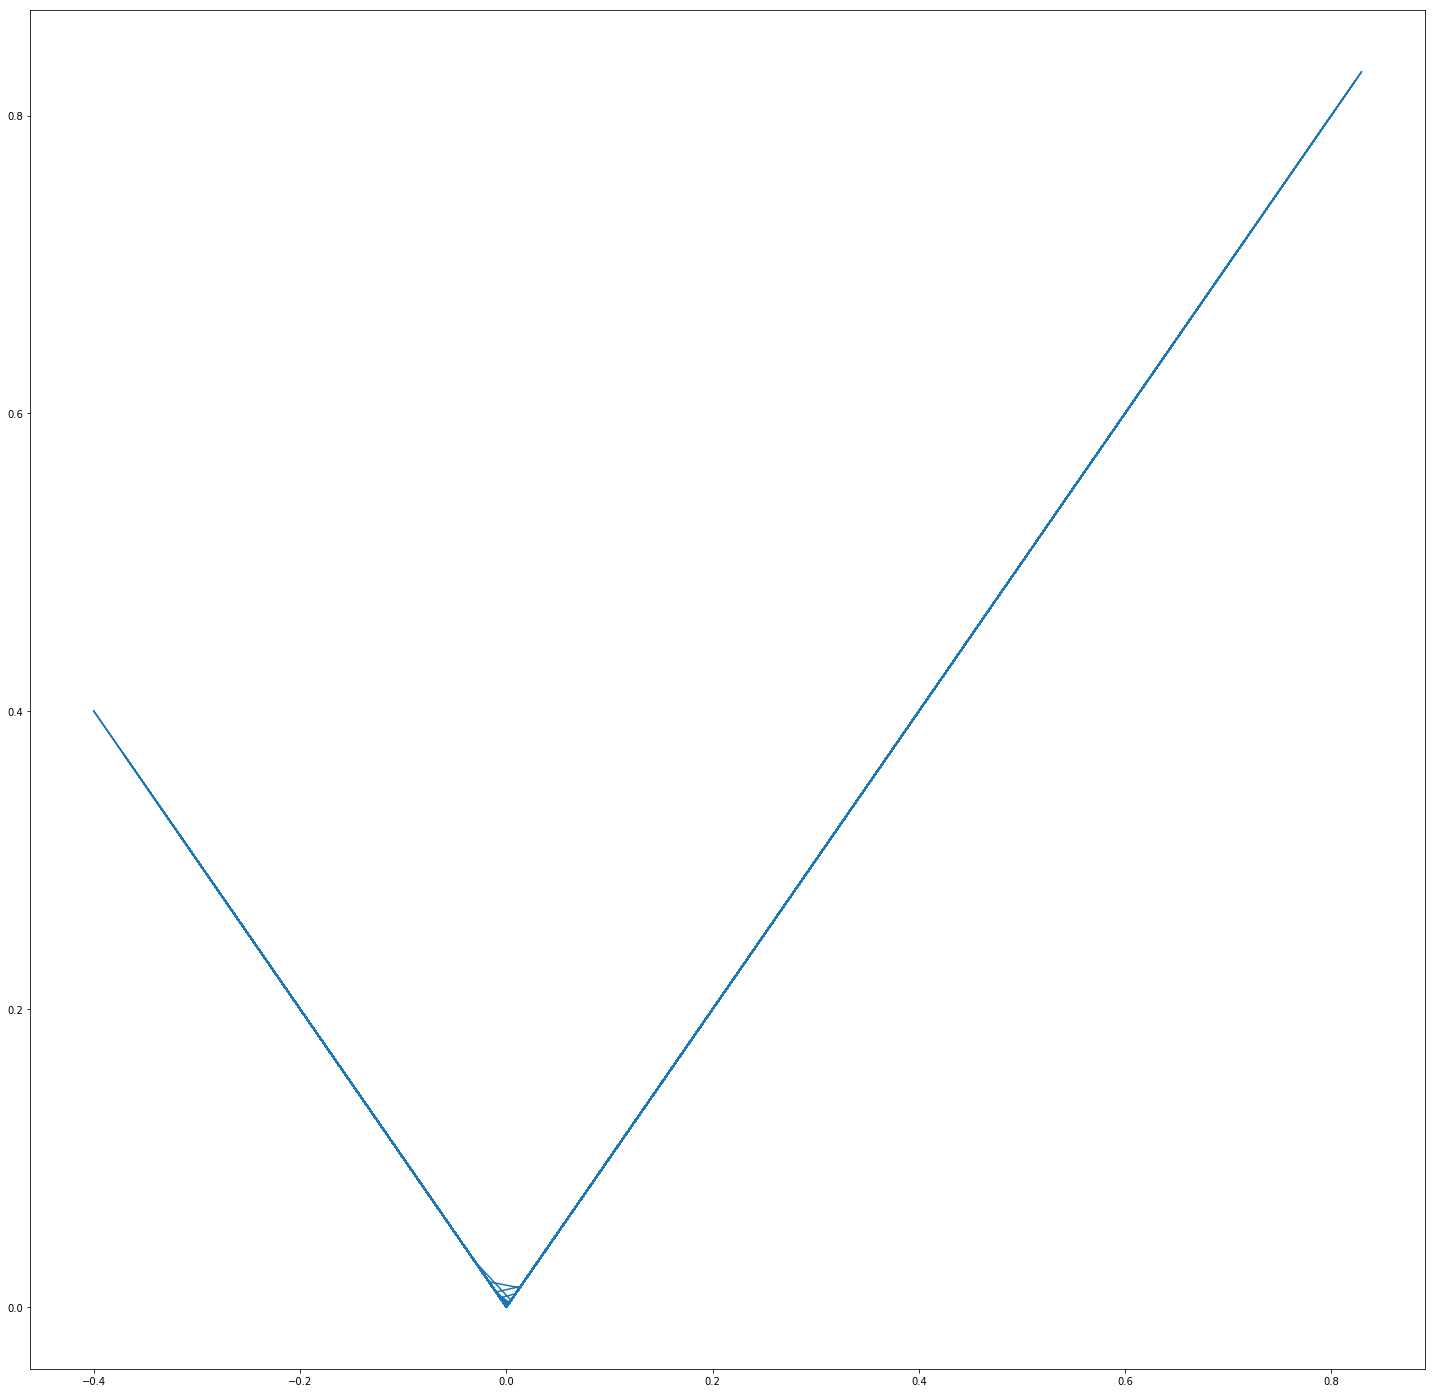

In [11]:
fft_out = fft(snd)

print(len(fft_out))
%matplotlib inline
plt.figure(figsize=(25,25))
plt.plot(snd, np.abs(fft_out))
plt.show()

In [12]:
# frequencies = fftfreq(len(fft_out) * wav_obj.rate)
# fig, ax = plt.subplots()
# ax.stem(frequencies, np.abs(snd))
# ax.set_xlabel('Frequency in Hertz [Hz]')
# ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')

In [13]:
print(len(wav_obj.data))

882000


Text(0.5,0,'Time (ms)')

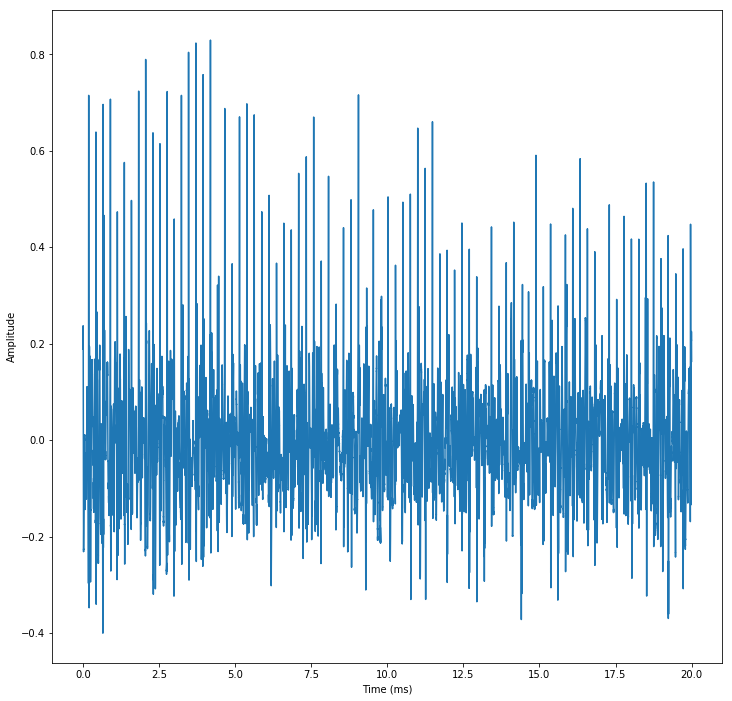

In [14]:
plt.figure(figsize=(12,12))
plt.plot(time_frame, snd)
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')

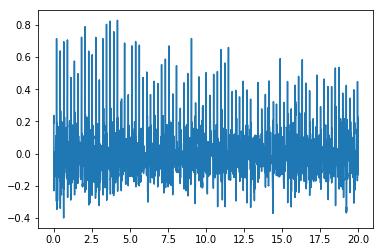

In [15]:
fig, ax = plt.subplots()
ax.plot(time_frame, snd)

In [22]:
samples = 1024
slices = util.view_as_windows(snd, window_shape=(samples,), step=100)
print(f'Audio shape: {snd}, Sliced audio shape: {slices.shape}')

ValueError: `window_shape` is incompatible with `arr_in.shape`